## Lab: Deep Learning with Normalization & Regularization

### Step 0: Import Libraries and Load the Dataset

In [2]:
# CodeGrade step0

# 1. Import Libraries and Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Step 1: Load and Preprocess the Data

Replace the `None`s appropriately.

In [ ]:
# CodeGrade step1

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create Training, Validation, and Test Splits
# create train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# further split train data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Normalize the Data
scaler = StandardScaler()
scaler.fit(X_train_final)

# scale all X data
X_train_scaled = scaler.transform(X_train_final)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Shapes and class distribution
X.shape,  y.shape, np.bincount(y), X_train_final.shape, X_val.shape, X_test.shape, X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape


((569, 30),
 (569,),
 array([212, 357], dtype=int64),
 (364, 30),
 (91, 30),
 (114, 30),
 (364, 30),
 (91, 30),
 (114, 30))

### Step 2: Build a Baseline Model

* Create a sequential model using Keras.

* Add a dense layer with 32 neurons, using the ReLU activation function and set the input shape to match the number of features in your training dataset.

* Add a second dense layer with 16 neurons, again using the ReLU activation function.

* Add a final dense layer with 1 neuron and a sigmoid activation function to produce a binary classification output.

* Compile the model by specifying the Adam optimizer, binary crossentropy as the loss function, and include accuracy as a metric.

* Fit the model using your scaled training data and corresponding labels, and provide the scaled validation data for performance monitoring. Set the training to run for 50 epochs with a batch size of 32 and keep the output minimal by setting verbosity to 0.

* Evaluate the trained model on the scaled validation data to obtain the validation loss and accuracy.

* Verify that the validation accuracy, when rounded to two decimal places, exceeds 90%.

In [ ]:
# CodeGrade step2

# Build a Baseline Model (No BatchNorm or Regularization)
baseline_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),                            # create first dense layer witih 32 neurons and relu activation to introduce non-linearity
    layers.Dense(16, activation='relu'),    # create 2nd hidden layer with 16 neurons and relu activation
    layers.Dense(1, activation='sigmoid')   # output layer for binary classification of breast cancer or not, sigmoid outputs probability for binary 0-1 
])

baseline_model.compile(
    optimizer='adam',           # adamused to combine momentum and adaptive learning rates
    loss='binary_crossentropy', # binary cross entropy used for binary classification where target is 0 or 1
    metrics=['accuracy']        # monitoring how often the model predicts the correct label
)

history_baseline = baseline_model.fit(
    X_train_scaled, y_train_final,          # training features and labels
    validation_data=(X_val_scaled, y_val),  # val set for monitoring generalization 
    epochs=50,              # train for 50 complete passes over training data
    batch_size=32,          # process 32 samples ata time
    verbose=0               # suppress training output
)

# Evaluate Baseline on Validation
val_loss_base, val_acc_base = baseline_model.evaluate(X_val_scaled, y_val, verbose=0)
round(val_acc_base,2) > 0.9

c:\Users\eeleoj62\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


True

### Step 3: Integrate Batch Normalization

- Create a sequential model using TensorFlow’s Keras API.
- Add a dense layer with 32 neurons, using a linear activation function, and specify the input shape to match your training data.
- Immediately add a Batch Normalization layer to standardize the outputs from the previous layer.
- Follow this with an Activation layer applying the ReLU activation function.
- Add another dense layer with 16 neurons, using a linear activation function.
- Again, insert a Batch Normalization layer after the dense layer.
- Add another Activation layer with ReLU to introduce non-linearity.
- Add a final dense layer with 1 neuron and a sigmoid activation function to provide a binary output.
- Compile the model using the Adam optimizer, binary crossentropy as the loss function, and include accuracy as a performance metric.
- Train (fit) the model using the scaled training data and the corresponding labels, and use the scaled validation data to monitor performance during training. Set the training to run for 50 epochs with a batch size of 32 and minimal verbosity.
- Evaluate the trained model on the scaled validation data to obtain the loss and accuracy.
- Ensure that the validation accuracy, when rounded to two decimal places, exceeds 90%.

In [ ]:
# CodeGrade step3

# Integrate Batch Normalization
model_bn = tf.keras.Sequential([
    layers.Dense(32, activation='linear', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),    # batch normalization after linear activation and before Relu because it normalizes the raw output of the dense layer, applying relu after helps stabilize learning
    layers.Activation('relu'),

    layers.Dense(16, activation='linear'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='sigmoid')
])

model_bn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_bn = model_bn.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate BN Model on Validation
val_loss_bn, val_acc_bn = model_bn.evaluate(X_val_scaled, y_val, verbose=0)
round(val_acc_bn,2) > 0.9


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6570 - loss: 0.6508 - val_accuracy: 0.6484 - val_loss: 0.6084
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8171 - loss: 0.4807 - val_accuracy: 0.8022 - val_loss: 0.4979
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8901 - loss: 0.3635 - val_accuracy: 0.8462 - val_loss: 0.4236
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9368 - loss: 0.2920 - val_accuracy: 0.8901 - val_loss: 0.3742
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9432 - loss: 0.2643 - val_accuracy: 0.8901 - val_loss: 0.3333
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9489 - loss: 0.2491 - val_accuracy: 0.9011 - val_loss: 0.3031
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9413 - loss: 0.2291 - val_accuracy: 0.9121 - val_loss: 0.2787
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9228 - loss: 0.2311 - val_accuracy: 0.9011 - v

True

### Step 4: Add L2 Regularization and Dropout

- Define the regularization parameters: set the L2 regularization factor (l2_reg) to 1e-4 and the dropout rate to 0.3.
- Create a sequential model using TensorFlow’s Keras API.
- Add a dense layer with 32 neurons and ReLU activation, applying L2 regularization to its weights, and set the input shape to match the training data.
- Insert a Dropout layer with the specified dropout rate to randomly disable a fraction of the neurons.
- Add a second dense layer with 16 neurons and ReLU activation, also applying L2 regularization to its weights.
- Follow this with another Dropout layer using the same dropout rate.
- Add a final dense layer with 1 neuron and a sigmoid activation function for binary classification output.
- Compile the model using the Adam optimizer, binary crossentropy as the loss function, and include accuracy as a metric.
- Train the model using the scaled training data and corresponding labels, while validating on the scaled validation data. Set the training to run for 50 epochs with a batch size of 32 and minimal verbosity.
- Evaluate the trained model on the validation data to obtain the loss and accuracy.
- Confirm that the validation accuracy, when rounded to two decimal places, exceeds 90%.

In [ ]:
# CodeGrade step4

# Add L2 Regularization and Dropout
l2_reg = 1e-4           # L2 regularization strength, small value to penalize large weights
dropout_rate = 0.3      # fraction of neurons to drop during training

model_reg = tf.keras.Sequential([
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), input_shape=(X_train_scaled.shape[1],)),        # apply L2 regularization to 1st layer
    layers.Dropout(dropout_rate),       # drop 30% of neurons during training

    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)), # 2nd layer L2 regularization
    layers.Dropout(dropout_rate),

    layers.Dense(1, activation='sigmoid')       # output layer for binary classification
])

model_reg.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history_reg = model_reg.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate Regularized Model on Validation
val_loss_reg, val_acc_reg = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
round(val_acc_reg,2) > .9

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5125 - loss: 0.9772 - val_accuracy: 0.6593 - val_loss: 0.6398
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7469 - loss: 0.6573 - val_accuracy: 0.9121 - val_loss: 0.4541
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8140 - loss: 0.4504 - val_accuracy: 0.9121 - val_loss: 0.3653
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8671 - loss: 0.3760 - val_accuracy: 0.9231 - val_loss: 0.3038
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9058 - loss: 0.3237 - val_accuracy: 0.9231 - val_loss: 0.2605
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9296 - loss: 0.2583 - val_accuracy: 0.9231 - val_loss: 0.2321
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9132 - loss: 0.2485 - val_accuracy: 0.9231 - val_loss: 0.2109
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9513 - loss: 0.1920 - val_accuracy: 0.9231 - v

True

### Step 5: Evaluate the Best Model on the Test Set and Visualize Performance

- Evaluate the regularized model on the test set by calling the model’s evaluate method with the scaled test features (X_test_scaled) and test labels (y_test), and set verbosity to 0 to suppress detailed output.
- Capture the resulting test loss and test accuracy in the variables test_loss_reg and test_acc_reg, respectively.
- Round the test accuracy (test_acc_reg) to two decimal places.
- Check that the rounded test accuracy is greater than 90% (i.e., exceeds 0.9) to ensure the model meets the performance threshold on the test data.

In [ ]:
# CodeGrade step5

# Compare Best Model on Test Set
# Example: Use the Regularized Model on Test
test_loss_reg, test_acc_reg = model_reg.evaluate(X_test_scaled, y_test, verbose=1)      
round(test_acc_reg,2) > 0.9

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9467 - loss: 0.1219


True

Plot Accuracy Over Epochs for the Regularized Model

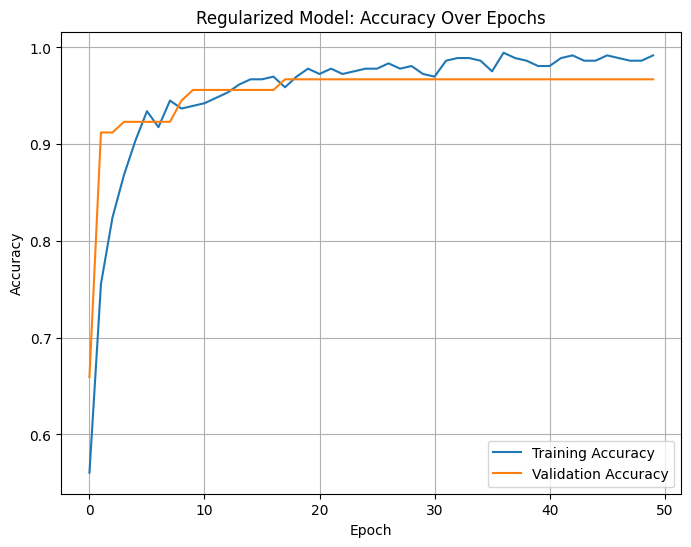

In [ ]:
# Plot Accuracy Over Epochs for the Regularized Model
plt.figure(figsize=(8, 6))
plt.plot(history_reg.history['accuracy'], label='Training Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Regularized Model: Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Training accuracy keeps improving but validation accuracy levels off. This indicates the model is overfitting and memorizing training data instead of generalizing.